# Project5: Niraj 
## Accident time series 



In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose
# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import acf

from statsmodels.graphics.tsaplots import plot_pacf

In [251]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [252]:
# Read the saved csv from the earlier notebook and set the index to the date_time column

df_accident_ts = pd.read_csv("./data/accident_ts.csv", index_col="date_time")

/Users/sarniraj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (63,65,85,87,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [254]:
# DateTime index should be loike: Index: 102385 entries, 2018-01-05 06:00:00 to 2020-12-24 09:25:00
df_accident_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102385 entries, 2018-01-05 06:00:00 to 2020-12-24 09:25:00
Data columns (total 97 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state                102385 non-null  int64  
 1   statename            102385 non-null  object 
 2   st_case              102385 non-null  int64  
 3   ve_total             102385 non-null  int64  
 4   ve_forms             102385 non-null  int64  
 5   pvh_invl             102385 non-null  int64  
 6   peds                 102385 non-null  int64  
 7   persons              102385 non-null  int64  
 8   permvit              102385 non-null  int64  
 9   pernotmvit           102385 non-null  int64  
 10  county               102385 non-null  int64  
 11  countyname           102385 non-null  object 
 12  city                 102385 non-null  int64  
 13  cityname             102385 non-null  object 
 14  day                  102385 non-null  int6

In [255]:
df_accident_ts.dtypes

state                   int64
statename              object
st_case                 int64
ve_total                int64
ve_forms                int64
                        ...  
day_3hr_window_name    object
day_2hr_window          int64
day_2hr_window_name    object
day_4hr_window          int64
day_4hr_window_name    object
Length: 97, dtype: object

In [261]:
# df_accident_ts.head() # nothing exciting...

In [257]:
# Drop Unnamed column if it exists
#df_accident_ts.drop(columns="Unnamed: 0", inplace=True)

In [258]:
df_accident_ts.isnull().sum()

state                  0
statename              0
st_case                0
ve_total               0
ve_forms               0
                      ..
day_3hr_window_name    0
day_2hr_window         0
day_2hr_window_name    0
day_4hr_window         0
day_4hr_window_name    0
Length: 97, dtype: int64

In [259]:
df_accident_ts.index.isnull().sum() # removed all nulls before creating the index and saving to csv (in earlier notebook)

0

In [262]:
# See relavant accident data 
df_accident_ts[['year', "month", "day_week", "hour", "minute", "day_3hr_window", "day_3hr_window_name", "fatals", "drunk_dr"]]
#df_accident_ts[['year', "month", "day", "hour", "minute", "date_time", "day_3hr_window"]]

,year,month,day_week,hour,minute,day_3hr_window,day_3hr_window_name,fatals,drunk_dr
date_time,,,,,,,,,
2018-01-05 06:00:00,2018,1,6,6,0,43,Friday 6:00 to 9:00,1,0
2018-01-08 00:48:00,2018,1,2,0,48,9,Monday 0:00 to 3:00,2,0
2018-01-08 22:50:00,2018,1,2,22,50,16,Monday 21:00 to 24:00,1,0
2018-01-09 13:02:00,2018,1,3,13,2,21,Tuesday 12:00 to 15:00,1,0
2018-01-19 07:09:00,2018,1,6,7,9,43,Friday 6:00 to 9:00,1,0
...,...,...,...,...,...,...,...,...,...
2020-12-12 16:36:00,2020,12,7,16,36,54,Saturday 15:00 to 18:00,1,0
2020-12-18 18:06:00,2020,12,6,18,6,47,Friday 18:00 to 21:00,2,0
2020-12-11 17:30:00,2020,12,6,17,30,46,Friday 15:00 to 18:00,1,0


### Draw graphs showing fatalities in our 2-, 3- and 4-hour windows

<Figure size 720x864 with 0 Axes>

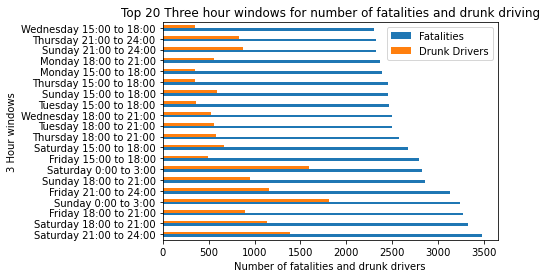

In [263]:
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).plot(kind= 'barh');

plt.title("Top 20 Three hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("3 Hour windows");
plt.legend(labels=labels);




### **Interpretation** : 
The most number of fatal accidents are on Saturdays from 9pm-midnight (last row), followed by Saturdays 6pm-9pm. 
The most fatal accidents involving drunk drivers are on Sunday midnight to 3am i.e late Saturday night, followed by Saturday midnight to 3am, i.e late Friday night. 



In [264]:
df_accident_ts.groupby(by=["day_3hr_window_name"])[['fatals']].count().sort_values(by= "fatals", ascending=False).head(20)


,fatals
day_3hr_window_name,
Saturday 21:00 to 24:00,3173
Saturday 18:00 to 21:00,3086
Friday 18:00 to 21:00,2985
Sunday 0:00 to 3:00,2904
Friday 21:00 to 24:00,2880
Sunday 18:00 to 21:00,2640
Saturday 0:00 to 3:00,2587
Friday 15:00 to 18:00,2536
Saturday 15:00 to 18:00,2423


<Figure size 720x864 with 0 Axes>

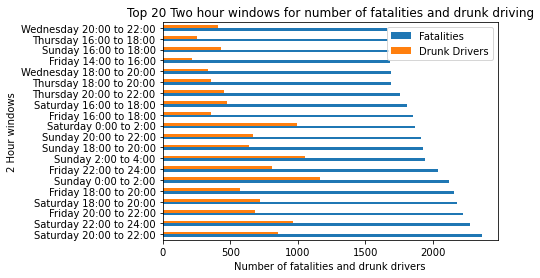

In [265]:
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_2hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).plot(kind= 'barh');

plt.title("Top 20 Two hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("2 Hour windows");
plt.legend(labels=labels);


<Figure size 720x864 with 0 Axes>

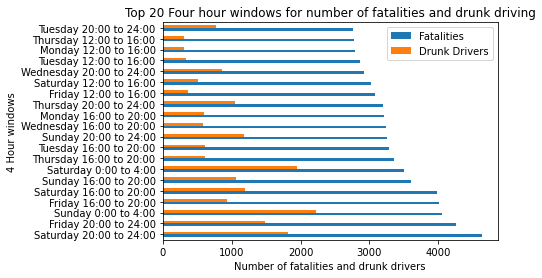

In [266]:
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_4hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).plot(kind= 'barh');

plt.title("Top 20 Four hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("4 Hour windows");
plt.legend(labels=labels);


In [267]:
#df_accident_ts.groupby("day_3hr_window")[[ "fatals", "day_weekname", "hour" ]].describe().head(10)


<AxesSubplot:xlabel='date_time'>

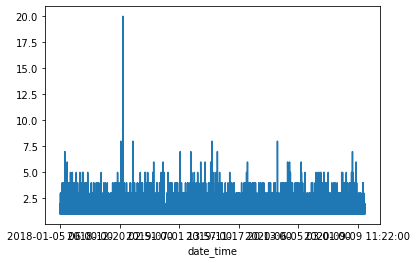

In [268]:
df_accident_ts['fatals'].plot( kind='line')

In [269]:

# TypeError: 'value' must be an instance of str or bytes, not a float????

""" labels = ['Fatals', "FatalsDiff", "Pct Change of Fatals"]
plt.figure(figsize=(10,6))
plt.plot( df_accident_ts['fatals'].astype(str) )
plt.plot( df_accident_ts['fatals'].diff() )
plt.plot( df_accident_ts['fatals'].pct_change() )
plt.legend(labels=labels);
 """

' labels = [\'Fatals\', "FatalsDiff", "Pct Change of Fatals"]\nplt.figure(figsize=(10,6))\nplt.plot( df_accident_ts[\'fatals\'].astype(str) )\nplt.plot( df_accident_ts[\'fatals\'].diff() )\nplt.plot( df_accident_ts[\'fatals\'].pct_change() )\nplt.legend(labels=labels);\n '

In [270]:
df_accident_ts['fatals'].diff(7).head(31)

date_time
2018-01-05 06:00:00    NaN
2018-01-08 00:48:00    NaN
2018-01-08 22:50:00    NaN
2018-01-09 13:02:00    NaN
2018-01-19 07:09:00    NaN
2018-01-19 22:08:00    NaN
2018-01-21 09:13:00    NaN
2018-01-23 00:32:00    0.0
2018-01-27 00:35:00   -1.0
2018-01-28 22:15:00    0.0
2018-01-28 12:00:00    0.0
2018-01-01 22:47:00    0.0
2018-01-01 20:05:00    1.0
2018-01-02 21:05:00    0.0
2018-01-02 14:30:00    0.0
2018-01-03 16:45:00    0.0
2018-01-04 13:22:00    0.0
2018-01-04 16:44:00    0.0
2018-01-05 02:00:00    0.0
2018-01-05 06:10:00   -1.0
2018-01-05 08:50:00    0.0
2018-01-05 09:09:00    0.0
2018-01-05 12:15:00    0.0
2018-01-05 22:20:00    0.0
2018-01-05 14:13:00    0.0
2018-01-07 18:18:00    0.0
2018-01-08 02:40:00    0.0
2018-01-08 07:25:00    0.0
2018-01-08 23:35:00    0.0
2018-01-09 07:15:00    0.0
2018-01-10 20:58:00    0.0
Name: fatals, dtype: float64

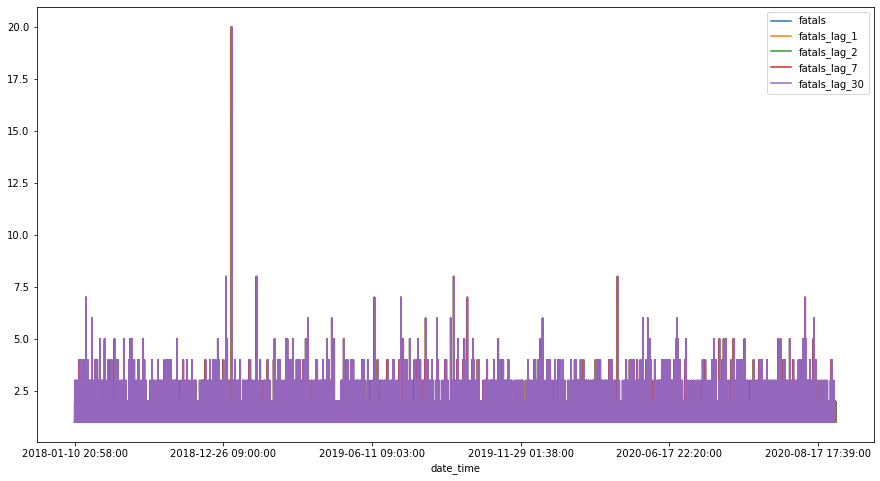

In [271]:
df_accident_ts["fatals_lag_1"] = df_accident_ts["fatals"].shift(1)
df_accident_ts["fatals_lag_2"] = df_accident_ts["fatals"].shift(2)
df_accident_ts["fatals_lag_7"] = df_accident_ts["fatals"].shift(7)
df_accident_ts["fatals_lag_30"] = df_accident_ts["fatals"].shift(30)

df2 = df_accident_ts[['fatals', 'fatals_lag_1', 'fatals_lag_2', 'fatals_lag_7', 'fatals_lag_30']].dropna()

df2.plot(figsize=(15,8));

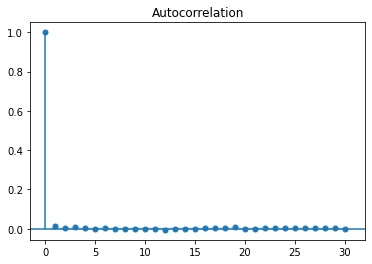

In [272]:
plot_acf( df_accident_ts['fatals'], lags=30); # blue shaed area is confidence inerval. If the datapoints are outside the CI, they are statitically significant and can be usedin the model



#### **Interpreation** : 
Dont see any trends here. Not surprising for accident data - its about 100 deaths per day

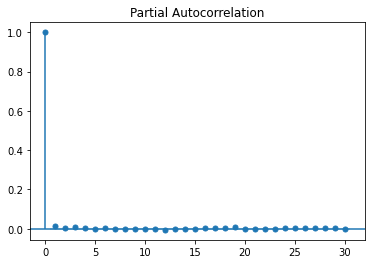

In [273]:
# Generate the PACF plot 

plot_pacf( df_accident_ts['fatals'], lags=30); # blue shaed area is confidence inerval. If the datapoints are outside the CI, they are statitically significant and can be usedin the model


#### **Interpreation** : 
Don't see any trends or seasonality here. Not surprising for accident data - its about 100 deaths per day. 
Should probably look at 3 hour lags rather than one day lags, since most accidents happen after 9pm on weekends

In [244]:
# Generate a time plot of fatalities

# takes over 10 mins for 100k records, so commenting out for now

#plot_series(df_accident_ts, ['fatals'], title='Fatalities over time', 
#            xlab='Time', ylab='Number of fatalities')



In [246]:
# df_accident_ts['fatals'].resample("M").mean() # mean across the year

In [248]:
#decomp = seasonal_decompose(df_accident_ts['fatals'])

#decomp.plot();
